In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

happ1 = pd.read_csv("2015.csv")
happ2 = pd.read_csv("2016.csv")
happ3 = pd.read_csv("2017.csv")
happ4 = pd.read_csv("2018.csv")
happ5 = pd.read_csv("2019.csv")

#### Bu veri setimizde belli başlı parametrelere bağlı kalarak ülkelerin mutluluk oranlarını hesaplama ve ülkelerin daim olacak şekilde mutluluğa ve refaha ulaşma düzeylerinin nasıl sağlanacağına dair istatistiksel veriler ortaya çıkarabilmeyi amaçlar. [Veri setinin linki](https://www.kaggle.com/unsdsn/world-happiness)

In [14]:
organize_2015_col = ["Standard Error","Dystopia Residual"]
happ1 = happ1.drop(columns=organize_2015_col)
happ1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

#### 2015 senesindeki veri setinde diğer yıllarla alakası olmayan değişkenleri çıkarma işlemi güdüyoruz burada. Birleştirme işlemi sırasında sıkıntı çıkarmaması için her yıl için belli parametreleri alacağımız bir yapı oluşturacağız. Yani temelde mutluluğu ölçen 5 - 6 tane parametre olacak.

In [15]:
organize_2016_col = ['Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual']
happ2 = happ2.drop(columns=organize_2016_col)
happ2.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

#### Aynı durumu 2016 verisi için de gerçekleştiriyoruz ve daha kompakt bir yapı oluşturmaya çalışıyoruz.

In [16]:
dummy = happ3
keys=dummy.columns
values=[]
for k in keys:
    k = k.replace('.',' ')
    values.append(k)
dict_columns = zip(keys,values)
happ3 =dummy.rename(columns=dict(dict_columns))
happ3.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy  GDP per Capita ', 'Family',
       'Health  Life Expectancy ', 'Freedom', 'Generosity',
       'Trust  Government Corruption ', 'Dystopia Residual'],
      dtype='object')

#### 2017 verisi için durum biraz farklı. Tamam diğerlerine yaptığımız işlemleri 2017 verisine de yapacağız fakat ayrıyeten bu verinin sütunlarında nokta var. Bunlardan kurtulup diğer veriler ile aynı yapıya sokmamız gerektiği için bu kod satırlarını yazıyoruz.

In [17]:
organize_2017_col = ["Whisker high","Whisker low","Dystopia Residual"]
happ3 = happ3.drop(columns=organize_2017_col)
happ3.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy  GDP per Capita ', 'Family', 'Health  Life Expectancy ',
       'Freedom', 'Generosity', 'Trust  Government Corruption '],
      dtype='object')

In [18]:
happ4.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [45]:
happ_list = [happ1.drop(columns=["Region"]), happ2.drop(columns=["Region"]), happ3, happ4, happ5]

#### Bu işlemleri bitirdikten sonra belirlediğimiz parametrelere göre birleştirme işlemi yapacağımız için her veri setinde ortak olan bir değişkeni ortadan kaldırmamız gerekiyor.

In [46]:
happ_column_old = happ_list[0].columns
happ_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity']
happ_list[0] = happ_list[0].rename(columns=dict(zip(happ_column_old,happ_column_new)))
happ_list[0]["Year"] = 2015
happ_list[0].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

#### Burada ise artık veri setlerimizi arındırdığımız için kendi oluşturduğumuz değişkenimizde belirlediğimiz parametreleri ve ek olarak yıl parametresi ekleyerek yeni bir frame oluşturuyoruz. Yukarıdaki kod yapısını diğer yıl verilerine de yaparak en sonda tüm veriyi birleştirerek temiz ve istenilen ölçütte bir veri seti tasarlamış oluyoruz.

In [47]:
happ_column_old = happ_list[1].columns
happ_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity']
happ_list[1] = happ_list[1].rename(columns=dict(zip(happ_column_old,happ_column_new)))
happ_list[1]["Year"] = 2016
happ_list[1].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

In [48]:
happ_column_old = happ_list[2].columns
happ_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity']
happ_list[2] = happ_list[2].rename(columns=dict(zip(happ_column_old,happ_column_new)))
happ_list[2]["Year"] = 2017
happ_list[2].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

In [49]:
happ_column_old = happ_list[3].columns
happ_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity']
happ_list[3] = happ_list[3].rename(columns=dict(zip(happ_column_old,happ_column_new)))
happ_list[3]["Year"] = 2018
happ_list[3].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

In [50]:
happ_column_old = happ_list[4].columns
happ_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity']
happ_list[4] = happ_list[4].rename(columns=dict(zip(happ_column_old,happ_column_new)))
happ_list[4]["Year"] = 2019
happ_list[4].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

In [51]:
df = pd.concat(happ_list, axis=0).reset_index(drop=True)
df.head()

,Country,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


#### Evet sonuç olarak tutarlı verimiz elimizde oluyor. Şimdi üzerinde belirli başlı istatistiksel yapıları uygulayabiliriz.

In [54]:
print(f" Veri setinin boyut sayısı: {df.ndim}\n",
     f"Veri setinin boyut bilgisi: {df.shape}\n",
     f"Veri setindeki toplam eleman sayısı: {df.size}\n")

 Veri setinin boyut sayısı: 2
 Veri setinin boyut bilgisi: (782, 10)
 Veri setindeki toplam eleman sayısı: 7820



In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     782 non-null    object 
 1   Rank        782 non-null    object 
 2   Score       782 non-null    float64
 3   Economy     782 non-null    float64
 4   Family      782 non-null    float64
 5   Health      782 non-null    float64
 6   Freedom     782 non-null    float64
 7   Trust       782 non-null    float64
 8   Generosity  781 non-null    float64
 9   Year        782 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
Economy,782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
Health,782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Trust,782.0,0.178526,0.119115,0.000,0.084860,0.155219,0.246864,0.838075
Generosity,781.0,0.165536,0.127410,0.000,0.067860,0.128000,0.236930,0.819710
Year,782.0,2016.993606,1.417364,2015.000,2016.000000,2017.000000,2018.000000,2019.000000


In [58]:
df.isnull().sum()

Country       0
Rank          0
Score         0
Economy       0
Family        0
Health        0
Freedom       0
Trust         0
Generosity    1
Year          0
dtype: int64

#### Evet gözlemlediğimiz kadarıyla buraya kadar hiçbir sorun yok. Set hakkındaki çoğu bilgiye erişmiş olduk.

In [61]:
df['Year'].value_counts()

2015    158
2016    157
2018    156
2019    156
2017    155
Name: Year, dtype: int64

In [82]:
max_country = df.groupby('Country').aggregate(["max"]) #Hangi ülkeler tüm faktörlerde en yüksek sıradadır?
max_country.head(10)

,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
,max,max,max,max,max,max,max,max,max
Country,,,,,,,,,
1,Finland,7.769,1.340,1.592,0.986,0.681,0.202,0.393,2019
2,Norway,7.600,1.456,1.582,0.996,0.686,0.286,0.410,2019
3,Norway,7.555,1.488,1.590,1.028,0.683,0.284,0.408,2019
4,Iceland,7.495,1.380,1.644,1.026,0.677,0.354,0.138,2019
5,Switzerland,7.488,1.420,1.549,0.999,0.660,0.322,0.357,2019
6,Switzerland,7.480,1.452,1.526,1.052,0.638,0.333,0.343,2019
7,Sweden,7.343,1.387,1.532,1.009,0.653,0.321,0.373,2019
8,New Zealand,7.324,1.303,1.601,1.026,0.669,0.365,0.389,2019


In [87]:
max_country = df.groupby('Country').aggregate(["max"]) #Hangi ülkeler tüm faktörlerde en düşük sıradadır?
max_country.tail(10)

,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
,max,max,max,max,max,max,max,max,max
Country,,,,,,,,,
United Arab Emirates,28,6.901,1.626343,1.266410,0.80925,0.641570,0.385830,0.324490,2017
United Kingdom,23,6.867,1.441634,1.496460,0.90943,0.596250,0.492774,0.519120,2017
United States,15,7.119,1.546259,1.419921,0.86179,0.546040,0.392579,0.410770,2017
Uruguay,32,6.545,1.217560,1.412228,0.81160,0.603620,0.245580,0.232400,2017
Uzbekistan,49,6.003,0.786441,1.548969,0.59772,0.658249,0.415984,0.343260,2017
Venezuela,82,6.810,1.133670,1.431338,0.72052,0.429080,0.110690,0.064491,2017
Vietnam,96,5.360,0.788548,1.277491,0.74676,0.594440,0.234968,0.250750,2017
Yemen,147,4.077,0.591683,0.935382,0.40064,0.355710,0.104125,0.098210,2017


In [114]:
data_2015 = df[df['Year'] == 2015].head()
data_2016 = df[df['Year'] == 2016].head()
pd.concat([data_2015, data_2016])

,Country,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
158,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
159,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
160,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
161,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
162,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


#### Burada 2015'te en mutlu ülke İsviçre iken 2016'da Danimarka olmuş. Şimdi İsviçrenin 2015 ve 2016 durumlarını karşılaştıralım:

In [136]:
data_2015_first = df[(df['Year'] == 2015) & (df['Country'] == 'Switzerland')] 
data_2016_first = df[(df['Year'] == 2016) & (df['Country'] == 'Switzerland')]
data_2017_first = df[(df['Year'] == 2017) & (df['Country'] == 'Switzerland')]
pd.concat([data_2015_first, data_2016_first, data_2017_first])

,Country,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2015
159,Switzerland,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2016
318,Switzerland,4,7.494,1.56498,1.516912,0.858131,0.620071,0.290549,0.367007,2017


#### İsviçre 2016'da ikinci sıraya düşmüş ve skorunda da 88 puan düşüş olmuş. Ekonomik puanında yükseliş olsa dahi aile yapısında gerilemeye devam etmiş.

In [128]:
data_2016 = df[df['Year'] == 2016].head()
data_2017 = df[df['Year'] == 2017].head()
pd.concat([data_2016, data_2017])

,Country,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
158,Denmark,1,7.526,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2016
159,Switzerland,2,7.509,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2016
160,Iceland,3,7.501,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2016
161,Norway,4,7.498,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2016
162,Finland,5,7.413,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920,2016
315,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
316,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
317,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
318,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
319,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [135]:
data_tr_y1 = df[(df['Year'] == 2015) & (df['Country'] == 'Turkey')]
data_tr_y2 = df[(df['Year'] == 2016) & (df['Country'] == 'Turkey')]
data_tr_y3=  df[(df['Year'] == 2017) & (df['Country'] == 'Turkey')]
data_tr_y4 = df[(df['Year'] == 2018) & (df['Country'] == 'Turkey')]
data_tr_y5 = df[(df['Year'] == 2019) & (df['Country'] == 'Turkey')]

pd.concat([data_tr_y1, data_tr_y2, data_tr_y3, data_tr_y4, data_tr_y5], axis=0)

,Country,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
75,Turkey,76,5.332,1.060980,0.946320,0.731720,0.228150,0.157460,0.122530,2015
235,Turkey,78,5.389,1.164920,0.877170,0.647180,0.238890,0.123480,0.047070,2016
383,Turkey,69,5.500,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672,2017


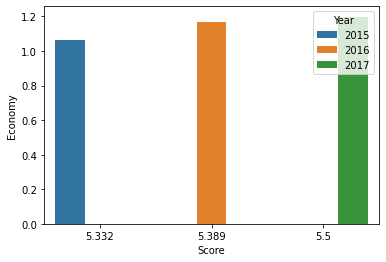

In [140]:
df_tr = df[df['Country'] == 'Turkey']
sns.barplot(x = "Score", y = 'Economy', hue = 'Year', data = df_tr);

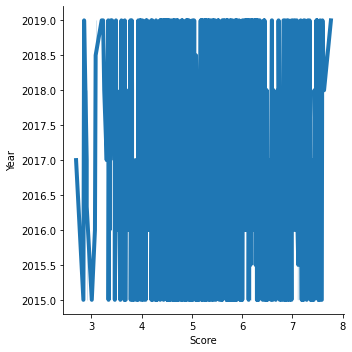

In [155]:
sns.relplot(data=df, x = 'Score', y = 'Year', kind="line", palette="crest", linewidth=4, zorder=5);

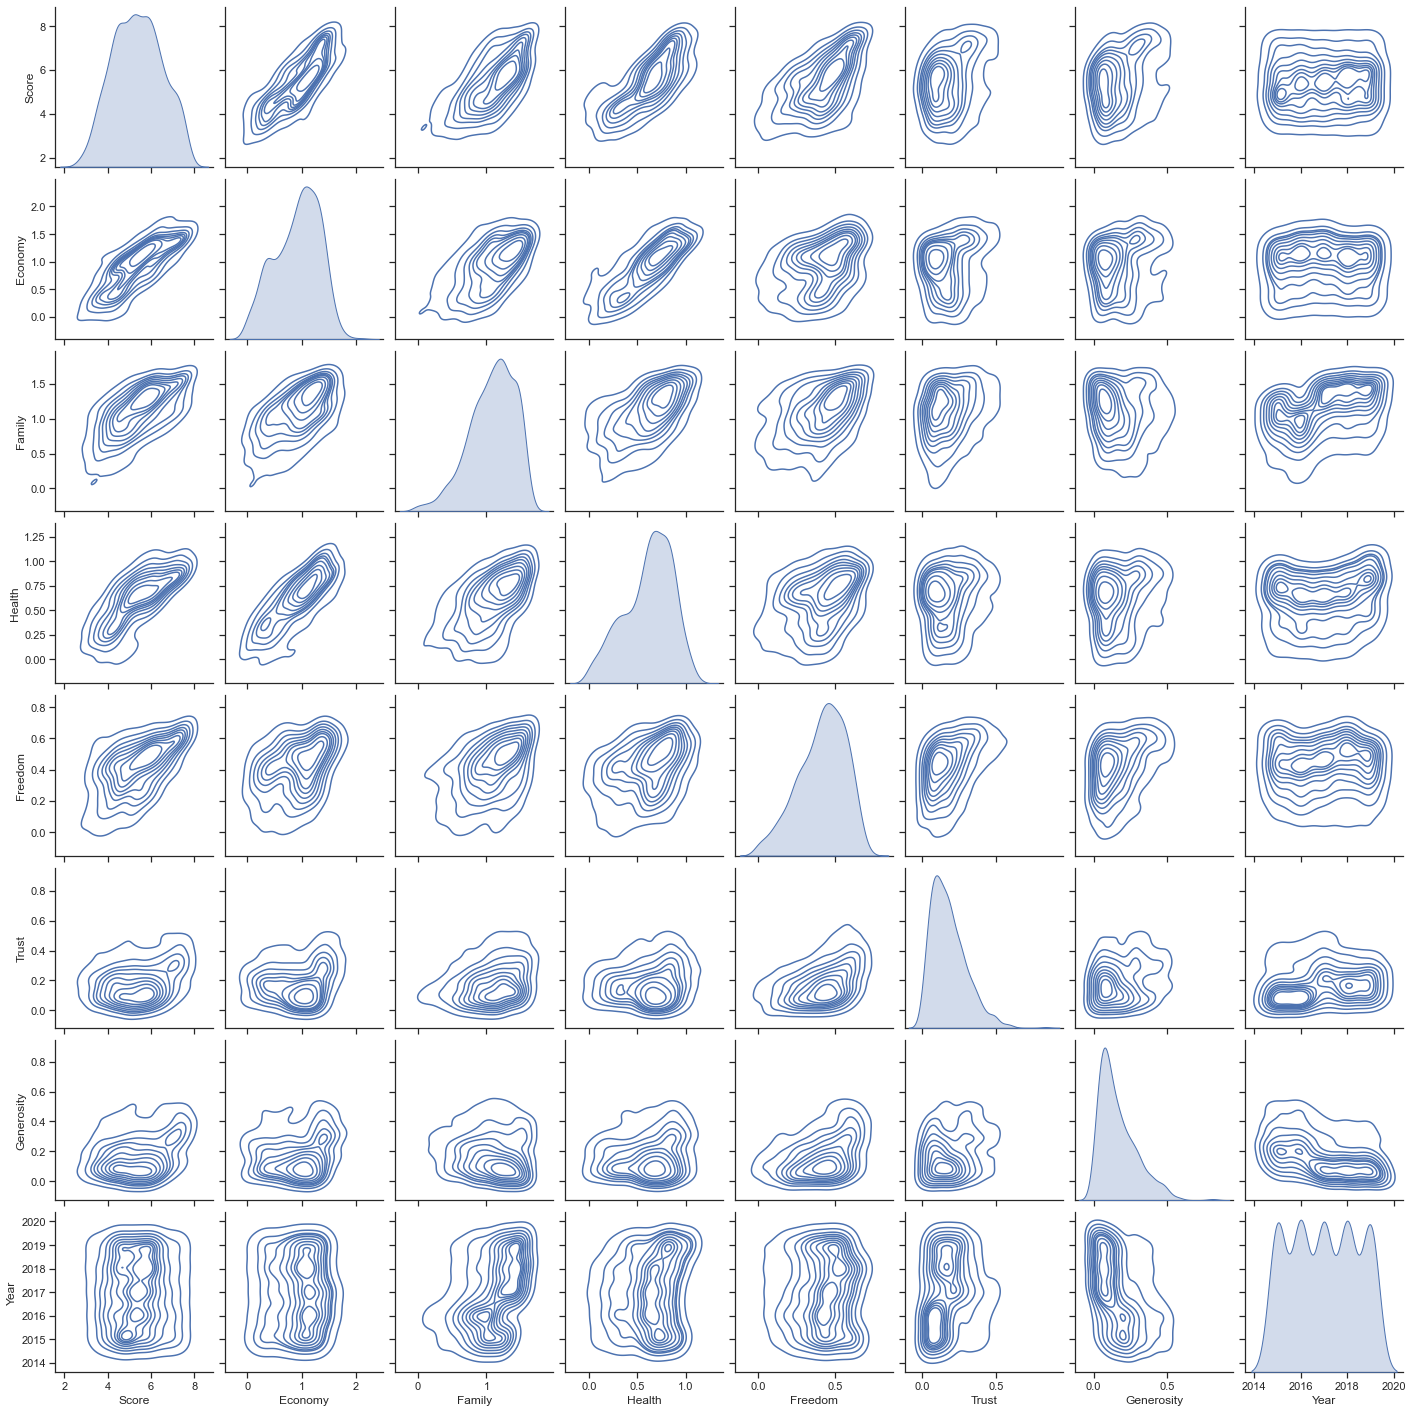

In [158]:
sns.set_theme(style="ticks")
sns.pairplot(df, kind="kde");